###  Load the Data

In [2]:
import pandas as pd
df = pd.read_csv('data.csv')
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           98.0  
2                    none        90.0           95.0           92.0  
3                    none        23.0           57.0           44.0  
4                    none        76.0           78.0           75.0  


### Inspect and Clean the Data

In [3]:

print(df.isnull().sum())
print(df.dtypes)

print(df['math score'].unique())
print(df['reading score'].unique())
print(df['writing score'].unique())


gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course          0
math score                     200
reading score                  200
writing score                  200
dtype: int64
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object
[ 72.  69.  90.  23.  76.  71.  88.  40.  85.  38.  nan  65.  78.  37.
  18.  46.  54.  66.  44.  74.  73.  67.  70.  62.  63.  34.  97.  81.
  58.  55.  59.  50.  57.  82.  53.  77.  33.  52.  79.  39.  61.  41.
  49.  56.  47.  28.  75.  27.  43.  45.  60.  98.  87.  51.  99.  84.
  91.  83.  89.  42.  22.  68. 100.  96.  94.  80.  48.  31.  92.  64.
  14.  86.   5.  35.  24. 

###  Handling Missing Values

In [4]:
# Fill missing numeric values with the mean of the column
df['math score'] = df['math score'].fillna(df['math score'].mean())
df['reading score'] = df['reading score'].fillna(df['reading score'].mean())
df['writing score'] = df['writing score'].fillna(df['writing score'].mean())

# For categorical columns, fill missing values with the mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['race/ethnicity'] = df['race/ethnicity'].fillna(df['race/ethnicity'].mode()[0])
df['parental level of education'] = df['parental level of education'].fillna(df['parental level of education'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['test preparation course'] = df['test preparation course'].fillna(df['test preparation course'].mode()[0])


### Handling Garbage Values

In [6]:
# Replace any unexpected string values or outliers that do not make sense
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')
df['math score'] = df['math score'].fillna(df['math score'].mean())

# Similar replacements for reading and writing scores
df['reading score'] = pd.to_numeric(df['reading score'], errors='coerce')
df['reading score'] = df['reading score'].fillna(df['reading score'].mean())

df['writing score'] = pd.to_numeric(df['writing score'], errors='coerce')
df['writing score'] = df['writing score'].fillna(df['writing score'].mean())


### Feature Engineering

In [7]:
# Adding a new feature for average score
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


### Encoding Categorical Variables


In [8]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])


### Splitting the Data


In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'average score' is the target variable
X = df.drop('average score', axis=1)
y = df['average score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training the Model

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model R^2 score: {score}")


Model R^2 score: 1.0


### Histogram of Scores:

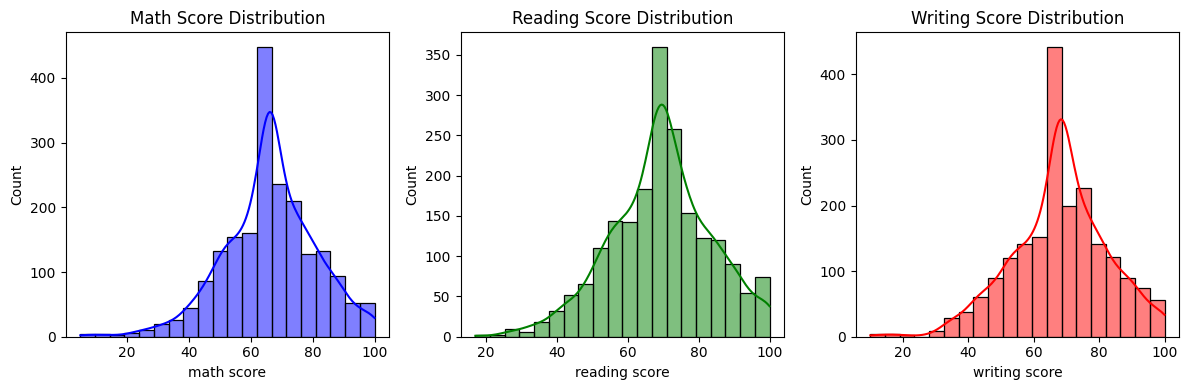

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of scores
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], bins=20, kde=True, color='blue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], bins=20, kde=True, color='green')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], bins=20, kde=True, color='red')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()


### Calculate correlation matrix

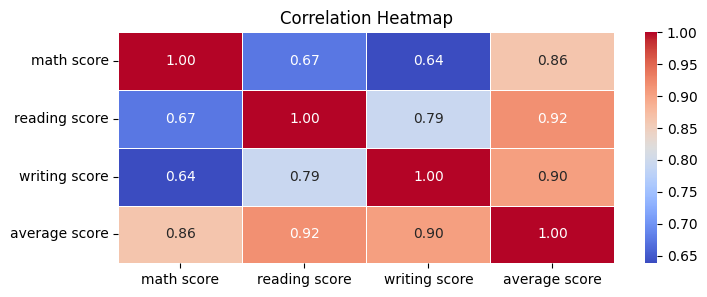

In [12]:
# Calculate correlation matrix
corr = df[['math score', 'reading score', 'writing score', 'average score']].corr()

# Plot heatmap
plt.figure(figsize=(8, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


###  Saving and Using the Trained Model

In [13]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'student_performance_model.pkl')


['student_performance_model.pkl']